In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style = 'whitegrid')
import textwrap

In [2]:
ds_df = pd.read_csv('all_jobs.csv')

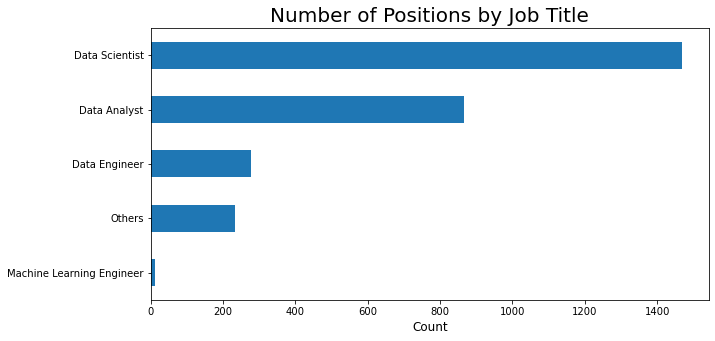

In [3]:
title = ds_df.groupby(['Job_Title']).count().sort_values('Company_Name')

title['Company_Name'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 20)
plt.show()

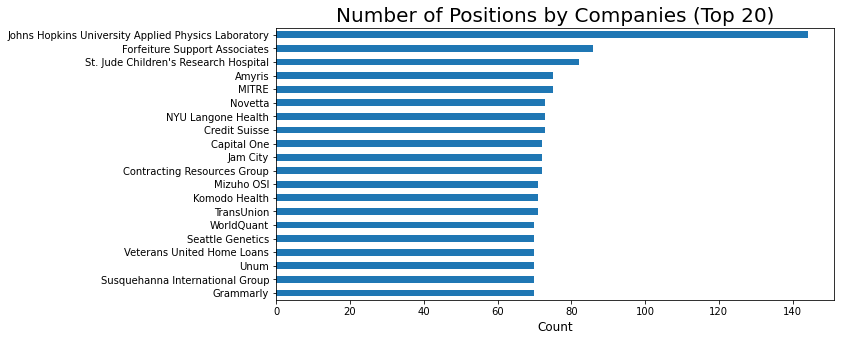

In [4]:
company = ds_df.groupby(['Company_Name']).count().sort_values('Job_Title').tail(20)

company['Job_Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

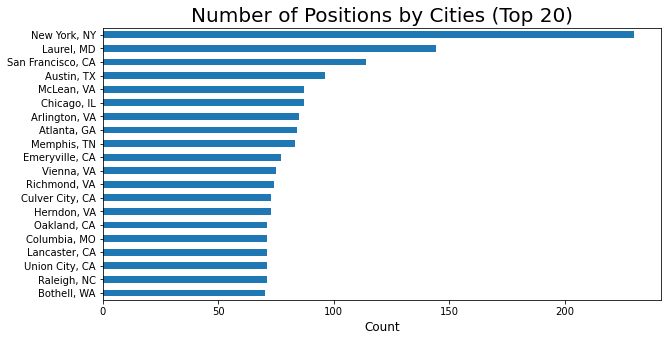

In [5]:
city = ds_df.groupby(['Location']).count().sort_values('Job_Title').tail(20)

city['Job_Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 20)', size = 20)
plt.show()

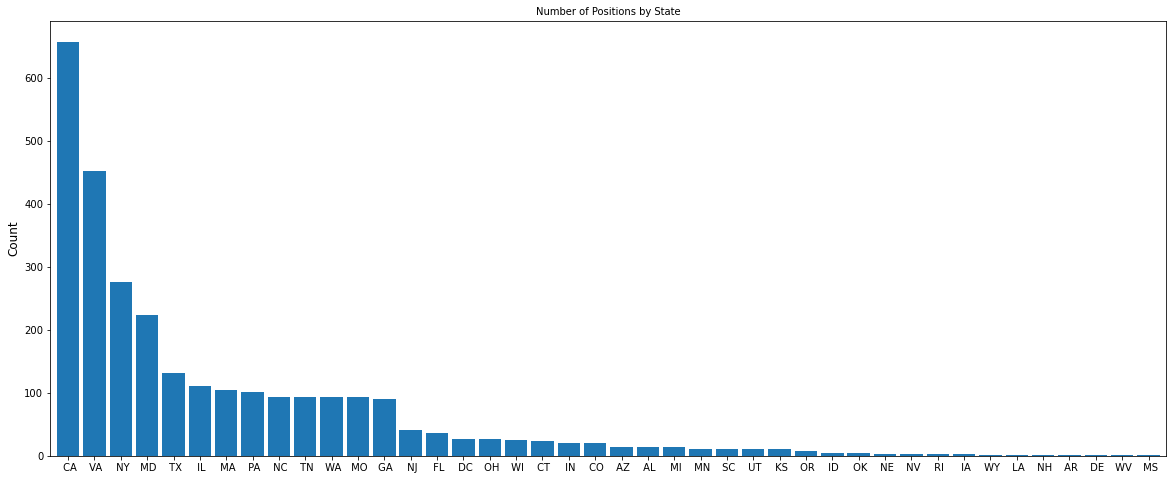

In [6]:
state = ds_df.groupby('State').count().sort_values('Job_Title',ascending = False)

state['Job_Title'].plot(kind = 'bar',figsize = (20,8) ,width = 0.85)
plt.xlabel('')
plt.ylabel('Count',size = 12)
plt.title('Number of Positions by State', size = 10)
plt.yticks(size = 10)
plt.xticks(size = 10, rotation = 720)
plt.show()

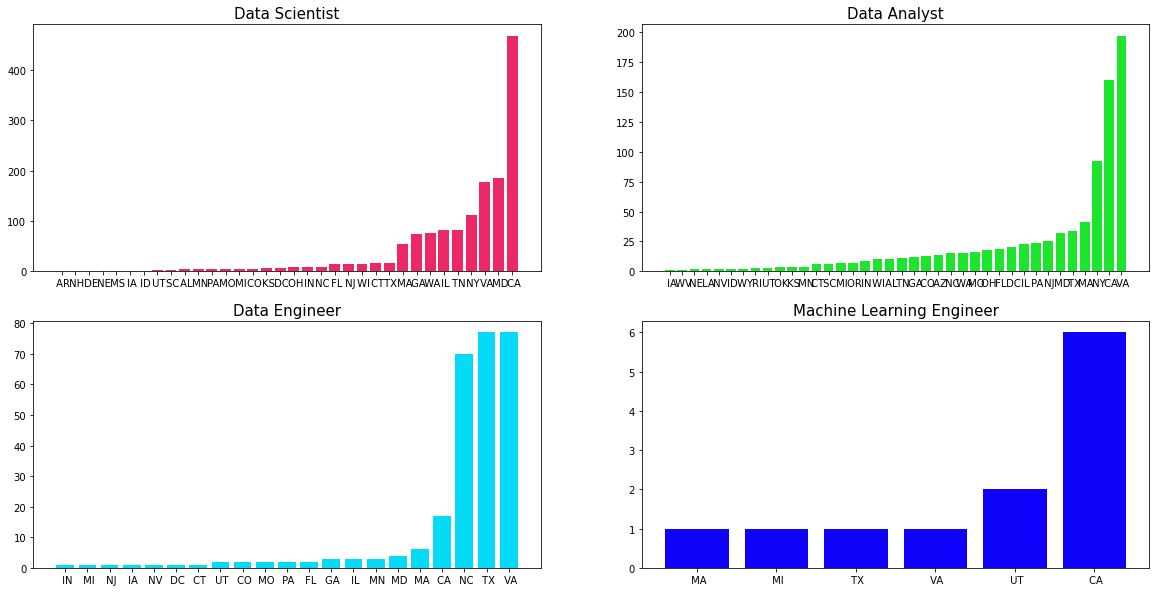

In [7]:
data = ds_df[ds_df['Job_Title'] != 'Others']
i = 1
color = ['#ed2867','#1ce62c','#05dbf7','#0f02fa']
fig = plt.figure(figsize=(20,10))
for title in data.Job_Title.unique():
    x = data[data['Job_Title']== str(title)].groupby(['State']).count().sort_values('Company_Name')
    plt.subplot(2, 2, i)
    i += 1
    plt.bar(x.index,x['Company_Name'], color = color[i-2])
    plt.xlabel('')
    plt.xticks(size = 10)
    plt.title(str(title), size = 15)
plt.show()

#### number of years exerience plot

In [8]:
years_df = pd.read_csv('years_exp.csv')
years_df.head()

,years_exp
0,2
1,2
2,10
3,10
4,3


In [9]:
years_exp = years_df['years_exp'] 

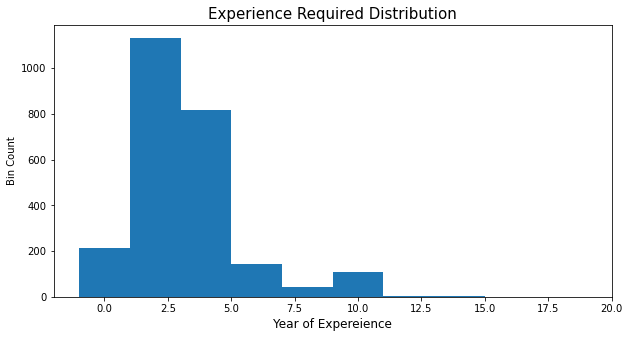

The average year of experience required is 3.85 years


In [10]:
plt.figure(figsize = (10,5))
plt.hist(years_exp,bins = list(range(0,21,2)), align = 'left')
plt.title('Experience Required Distribution', size = 15)
plt.ylabel('Bin Count')
plt.xlabel('Year of Expereience', size = 12)
plt.show()
print(f'The average year of experience required is {round(np.mean(years_exp),2)} years')

#### Skills plot

In [11]:
skills_df = pd.read_csv('skills.csv')
skills_df

,skill,regex_pattern,count,pct
0,R,\WR\W+\s*,1080,0.38
1,Python,(?i)\WPython\W,1366,0.48
2,Hadoop,(?i)\WHadoop\W?,248,0.09
3,SQL,(?i)SQL\w*,1515,0.53
4,Tableau,(?i)\WTableau\W?,515,0.18
5,NoSQL,(?i)\WNoSQL\W?,264,0.09
6,Power BI,(?i)\WPower\s?BI\W?,221,0.08
7,AWS,(?i)\WAWS\W?,321,0.11
8,SAS,(?i)\WSAS\W?,273,0.10
9,Hive,(?i)\WHive\W?,198,0.07


<ipython-input-12-bdfe6f0f0b94>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])


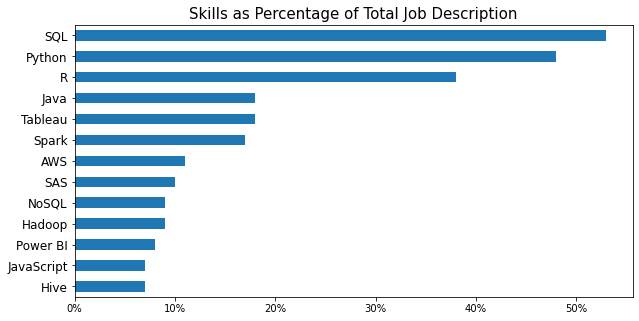

In [12]:
x = skills_df.sort_values(by = 'pct')
ax =x['pct'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

#### Education qualification plot

In [13]:
ed_df = pd.read_csv('ed.csv')
ed_df.columns

Index(['Unnamed: 0', 'degree', 'count', 'pct'], dtype='object')

In [14]:
del ed_df['Unnamed: 0']
ed_df

,degree,count,pct
0,PhD,672,0.235294
1,Masters,1025,0.358894
2,Bachelors Degree,1038,0.363445


<ipython-input-15-756b67a406b4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


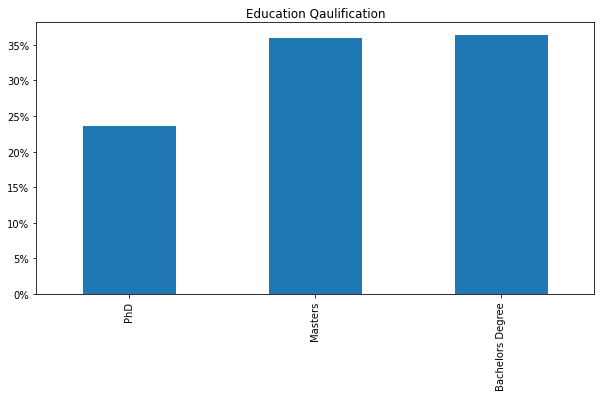

In [15]:
ax =ed_df['pct'].plot(kind = "bar", figsize =(10,5))
ax.set_title('Education Qaulification')
ax.set_xticklabels(ed_df.degree)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

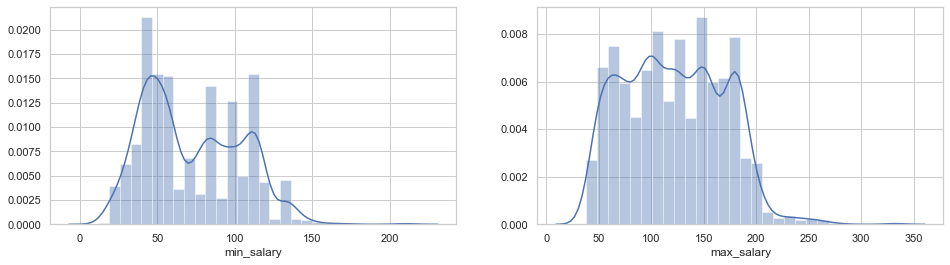

In [17]:
fig, ax = plt.subplots(1,2, figsize = [16,4])

sns.distplot(ax = ax[0], a = ds_df['min_salary'])

sns.distplot( ax = ax[1], a = ds_df['max_salary'])
plt.show()

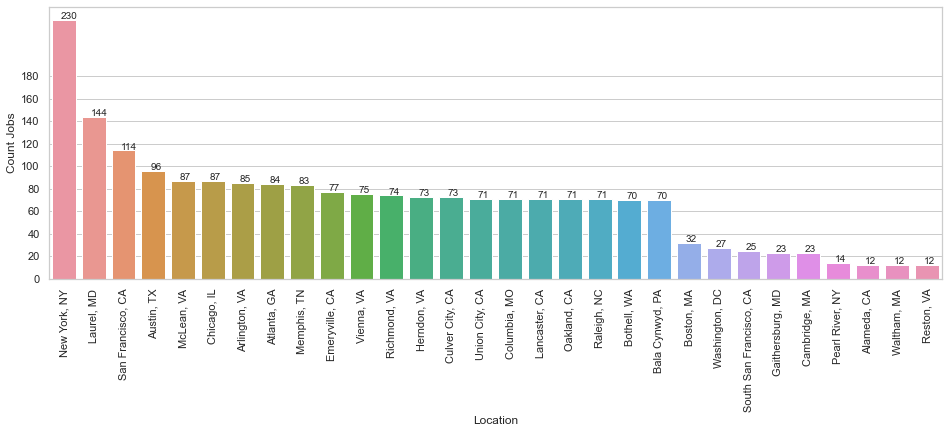

In [24]:
dataview = ds_df.groupby('Location')['Job_Title'].count().reset_index()
dataview = dataview.sort_values('Job_Title', ascending = False).head(30)

fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = dataview, x = 'Location', y = 'Job_Title', ax = ax)
ax.set_ylabel('Count Jobs')
ax.set_yticks(np.arange(0, 200, step = 20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
for index,dataview in enumerate(dataview['Job_Title'].astype(int)):
       ax.text(x=index-0.1 , y =dataview+1 , s=f"{dataview}" , fontdict=dict(fontsize=10))
plt.show()

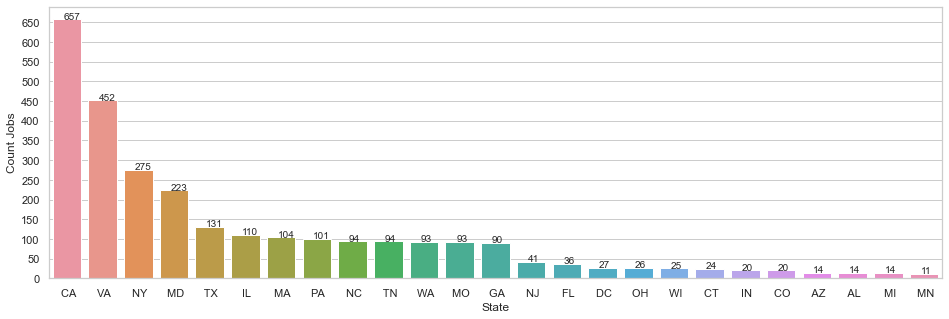

In [32]:
dataview = ds_df.groupby('State')['Job_Title'].count().reset_index()
dataview = dataview.sort_values('Job_Title', ascending = False).head(25)

fig, ax = plt.subplots(figsize = [16,5])
sns.barplot(data = dataview, x = 'State', y = 'Job_Title', ax = ax)
ax.set_ylabel('Count Jobs')
ax.set_yticks(np.arange(0, 700, step = 50))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
for index,dataview in enumerate(dataview['Job_Title'].astype(int)):
       ax.text(x=index-0.1 , y =dataview+1 , s=f"{dataview}" , fontdict=dict(fontsize=10))
plt.show()

In [42]:
dataview_top=ds_df.groupby('Location')[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False).head(10)
dataview_top.reset_index(inplace = True)

dataview_bot=data.groupby('Location')[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=True).head(10)
dataview_bot.reset_index(inplace = True)

print(dataview_top, '\n')
print(dataview_bot)

                  Location  max_salary  min_salary
0         Owings Mills, MD  232.000000  136.000000
1          Santa Clara, CA  227.333333  155.666667
2     South Plainfield, NJ  193.000000  105.000000
3             Brisbane, CA  191.000000   95.000000
4          Simi Valley, CA  189.500000  105.000000
5           Pleasanton, CA  188.000000  105.000000
6           Menlo Park, CA  186.666667  115.000000
7           Centennial, CO  185.000000   95.000000
8  South San Francisco, CA  184.560000  109.760000
9              Bothell, WA  183.000000  117.000000 

            Location  max_salary  min_salary
0  The Woodlands, TX   40.000000        20.0
1     Harrisburg, PA   40.000000        37.0
2        Hubbard, OH   42.000000        22.0
3      Alabaster, AL   43.000000        25.0
4         Vienna, VA   46.906667        43.4
5   West Reading, PA   48.000000        34.0
6    Gainesville, FL   50.000000        28.0
7    Springfield, MO   50.000000        29.0
8    Chattanooga, TN   51.000000

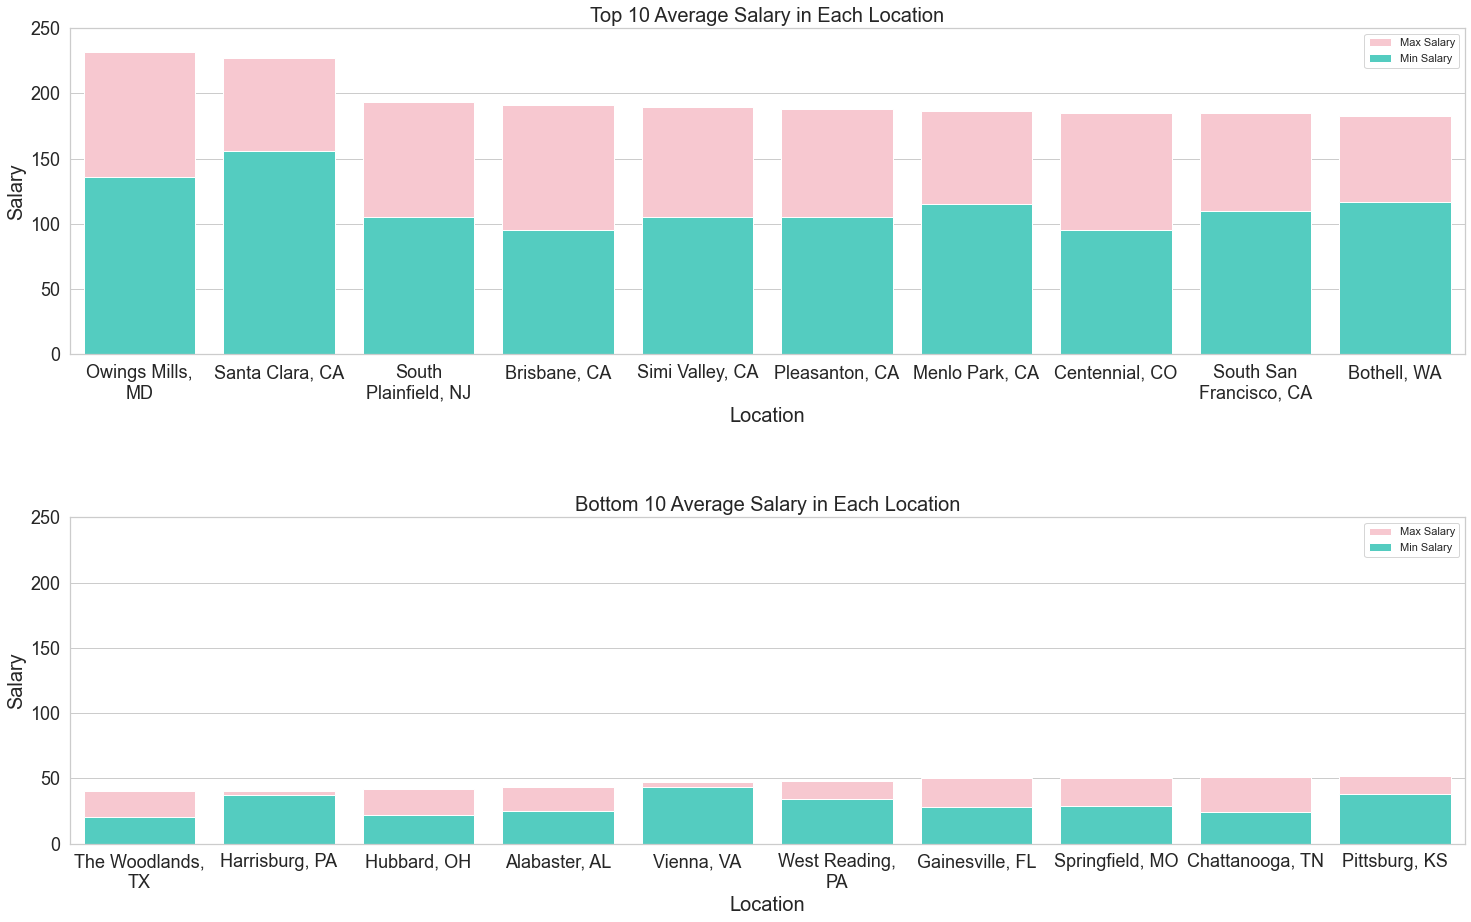

In [43]:
max_width = 15
data_salary = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (25,15))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Location', y = 'max_salary', color = 'pink', label = 'Max Salary')
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Location', y = 'min_salary', color = 'turquoise', label = 'Min Salary')
    ax[i].legend()
    ax[i].set_title(data_title[i]+' Average Salary in Each Location', fontsize = 20)
    ax[i].set_ylabel('Salary', fontsize = 20)
    ax[i].set_xlabel('Location', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 300, step = 50))
    ax[i].tick_params(labelsize = 18)
    
plt.show()

In [38]:
dataview_top=ds_df.groupby('Sector')[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False).head(10)
dataview_top.reset_index(inplace = True)

dataview_bot=ds_df.groupby('Sector')[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=True).head(10)
dataview_bot.reset_index(inplace = True)

print(dataview_top, '\n')
print(dataview_bot)

                              Sector  max_salary  min_salary
0                         Government  169.561798   99.831461
1                Aerospace & Defense  141.668293   63.102439
2             Information Technology  140.817352   88.458904
3                            Finance  139.731939   85.258555
4  Restaurants, Bars & Food Services  129.000000   81.000000
5                              Media  128.846154   77.912088
6          Biotech & Pharmaceuticals  128.688095   71.428571
7       Oil, Gas, Energy & Utilities  113.785714   67.785714
8                          Insurance  111.447761   65.701493
9         Transportation & Logistics  107.888889   62.555556 

                               Sector  max_salary  min_salary
0                   Business Services   72.302632   51.694079
1                     Mining & Metals   74.000000   36.000000
2    Arts, Entertainment & Recreation   75.000000   41.000000
3  Construction, Repair & Maintenance   78.625000   43.875000
4              Ag

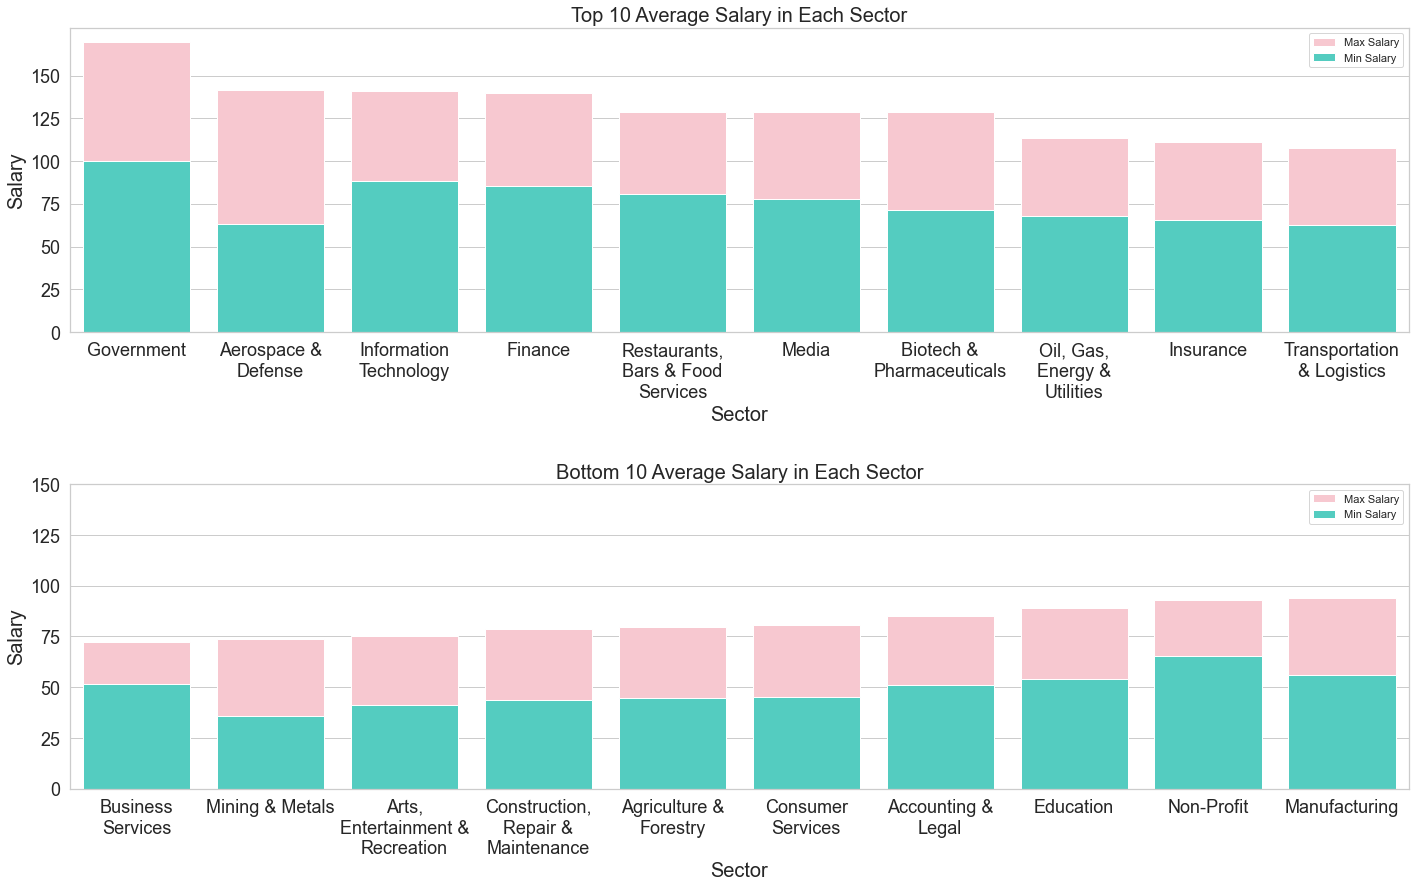

In [40]:
max_width = 15
data_salary = [dataview_top, dataview_bot]
data_title = ['Top 10', 'Bottom 10']
fig, ax = plt.subplots(2,1, figsize = (24,14))
fig.subplots_adjust(hspace = 0.5)
for i in range(0,2):
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Sector', y = 'max_salary', color = 'pink', label = 'Max Salary')
    sns.barplot(ax = ax[i], data = data_salary[i], x = 'Sector', y = 'min_salary', color = 'turquoise', label = 'Min Salary')
    ax[i].legend()
    ax[i].set_title(data_title[i]+' Average Salary in Each Sector', fontsize = 20)
    ax[i].set_ylabel('Salary', fontsize = 20)
    ax[i].set_xlabel('Sector', fontsize = 20)
    ax[i].set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax[i].get_xticklabels())
    ax[i].set_yticks(np.arange(0, 175, step = 25))
    ax[i].tick_params(labelsize = 18)
    
plt.show()